https://medium.com/mlreview/a-simple-deep-learning-model-for-stock-price-prediction-using-tensorflow-30505541d877

In [89]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline



In [90]:
# The dataset contained n = 41266 minutes of data ranging 
# from April to August 2017 on 500 stocks as well as the total S&P 500 index price

data = pd.read_csv('data_stocks.csv')
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [91]:
# Drop date variable
data = data.drop(['DATE'], 1)

In [92]:
# Dimensions of dataset
n = data.shape[0]
p = data.shape[1]

print (n)
print (p)

# Make data a numpy array
data = data.values

# the data is already cleaned, no misssing values 

41266
501


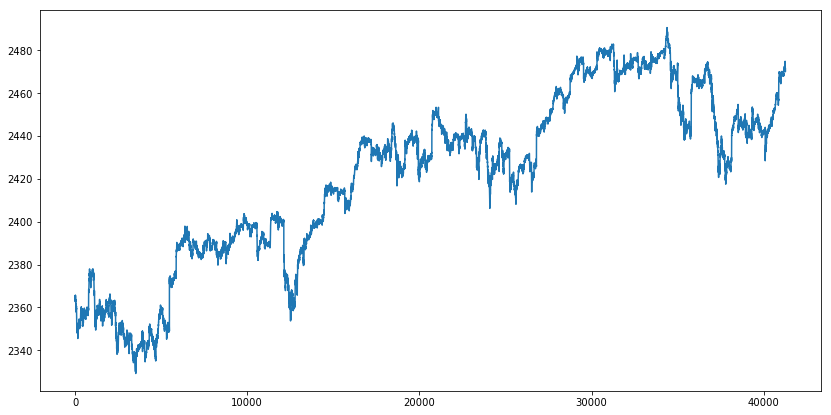

In [93]:
# time series plot of SP500
# visualization shows that there7s dependence of stock price in time, as they shift 1 minute into the future

fig = plt.figure(figsize = (14, 7))
plt.plot(data[:, 0])

In [94]:
# Train test split - 
# The training data ranges from April to approx. end of July 2017, the test data ends end of August 2017. 


train_start = 0
train_end = int(np.floor(0.8 * n))

test_start = train_end + 1
test_end = n

data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]

In [95]:
# data scaling -
# most common activation functions of the network's neurons such as tanh or sigmoid are defined on the [-1, 1] or [0, 1]

# Scaling
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaler.fit(data_train)

data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

In [96]:
# Build feature matrix and target vectorr

X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

In [97]:
# Help on MinMaxScaler in module sklearn.preprocessing.data object:


# Transforms features by scaling each feature to a given range.
  
#    This estimator scales and translates each feature individually such
#    that it is in the given range on the training set, i.e. between zero and one.

#    The transformation is given by::
  
#        X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#        X_scaled = X_std * (max - min) + min
  
#    where min, max = feature_range.
  
#    This transformation is often used as an alternative to zero mean, unit variance scaling.

## placeholder weights and bias 

In [98]:
import tensorflow as tf

It all starts with placeholders. Two placeholders are needed in order to fit our model: X contains the network's inputs (the stock prices of all S&P 500 constituents at time T = t) and Y the network's outputs (the index value of the S&P 500 at time T = t + 1).

The shape of the placeholders correspond to [None, n_stocks] with [None] meaning that the inputs are a 2-dimensional matrix and the outputs are a 1-dimensional vector. It is crucial to understand which input and output dimensions the neural net needs in order to design it properly.

In [99]:
# Define a and b as placeholders
a = tf.placeholder(dtype = tf.int8)
b = tf.placeholder(dtype = tf.int8)

# Define the addition
c = tf.add(a, b)

# Initialize the graph
graph = tf.Session()

# Run the graph
graph.run(c, feed_dict = {a: 5, b: 4})

9

In [100]:
# Placeholder
# The None argument indicates that at this point the number of observations that flow through the neural net graph in each batch is not known yet, so it is kept flexible. 
# define the variable batch_size that controls the number of observations per training batch at a later stage.

X = tf.placeholder(dtype = tf.float32, shape = [None, n_stocks])
Y = tf.placeholder(dtype = tf.float32, shape = [None])


Weights and biases are represented as variables in order to adapt during training. Variables need to be initialized, prior to model training.

The model consists of four hidden layers. The first layer contains 1024 neurons, slightly more than double the size of the inputs. Subsequent hidden layers are always half the size of the previous layer, which means 512, 256 and finally 128 neurons. A reduction of the number of neurons for each subsequent layer compresses the information the network identifies in the previous layers. Of course, other network architectures and neuron configurations are possible but are out of scope for this introduction level article.


In [101]:
# Model architecture parameters

n_stocks = 500

n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128

n_target = 1

In [102]:
# Layer 1: Variables for hidden weights and biases
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))

# Layer 2: Variables for hidden weights and biases
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))

# Layer 3: Variables for hidden weights and biases
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))

# Layer 4: Variables for hidden weights and biases
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

# Output layer: Variables for output weights and biases
W_out = tf.Variable(weight_initializer([n_neurons_4, n_target]))
bias_out = tf.Variable(bias_initializer([n_target]))


## network architecture

After definition of the required weight and bias variables, the network topology, the architecture of the network, needs to be specified. Hereby, placeholders (data) and variables (weighs and biases) need to be combined into a system of sequential matrix multiplications.

Furthermore, the hidden layers of the network are transformed by activation functions. Activation functions are important elements of the network architecture since they introduce non-linearity to the system. There are dozens of possible activation functions out there, one of the most common is the rectified linear unit (ReLU) which will also be used in this model.

In [103]:
# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

# Output layer (must be transposed)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

## cost function

The cost function of the network is used to generate a measure of deviation between the network’s predictions and the actual observed training targets. For regression problems, the mean squared error (MSE) function is commonly used. MSE computes the average squared deviation between predictions and targets. Basically, any differentiable function can be implemented in order to compute a deviation measure between predictions and targets.

In [104]:
# Cost function

mse = tf.reduce_mean(tf.squared_difference(out, Y))

## optimizer

The optimizer takes care of the necessary computations that are used to adapt the network’s weight and bias variables during training.

Those computations invoke the calculation of so called gradients, that indicate the direction in which the weights and biases have to be changed during training in order to minimize the network’s cost function. The development of stable and speedy optimizers is a major field in neural network an deep learning research.


In [105]:
# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

## initializer

Initializers are used to initialize the network’s variables before training.

Since neural networks are trained using numerical optimization techniques, the starting point of the optimization problem is one the key factors to find good solutions to the underlying problem. There are different initializers available in TensorFlow, each with different initialization approaches. Here, tf.variance_scaling_initializer() is used, which is one of the default initialization strategies.

Note, that with TensorFlow it is possible to define multiple initialization functions for different variables within the graph. However, in most cases, a unified initialization is sufficient.


In [106]:
# Initializers
sigma = 1

# weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
weight_initializer = tf.contrib.layers.variance_scaling_initializer(mode = "FAN_AVG", uniform = True, dtype = tf.float32)


bias_initializer = tf.zeros_initializer()

## Fitting the neural network

Training is usually done by minibatch training. During minibatch training random data samples of n = batch_size are drawn from the training data and fed into the network. The training dataset gets divided into n / batch_size batches that are sequentially fed into the network. At this point the placeholders X and Y come into play. They store the input and target data and present them to the network as inputs and targets.

A sampled data batch of X flows through the network until it reaches the output layer. There, TensorFlow compares the models predictions against the actual observed targets Y in the current batch. Afterwards, TensorFlow conducts an optimization step and updates the networks parameters, corresponding to the selected learning scheme. After having updated the weights and biases, the next batch is sampled and the process repeats itself. The procedure continues until all batches have been presented to the network. One full sweep over all batches is called an epoch.

The training of the network stops once the maximum number of epochs is reached or another stopping criterion defined by the user applies.

During the training, we evaluate the networks predictions on the test set — the data which is not learned, but set aside — for every 5th batch and visualize it.

Additionally, the images are exported to disk. The model quickly learns the shape and location of the time series in the test data and is able to produce an accurate prediction.


In [141]:
# Make Session
net = tf.Session()
# Run initializer
net.run(tf.global_variables_initializer())

# Setup interactive plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test * 0.5)
plt.show()

# Number of epochs and batch size
epochs = 10
batch_size = 256

for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict = {X: batch_x, Y: batch_y})

        # Show progress on testing data after every five batch training
        if np.mod(i, 5) == 0:
            # Prediction
            pred = net.run(out, feed_dict = {X: X_test})
            # real time plot 
            line2.set_ydata(pred)
                
            print (i)
    
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            file_name = 'img/epoch_' + str(e) + '_batch_' + str(i) + '.jpg'
            plt.savefig(file_name)
            plt.pause(0.01)
            
# Print final MSE after Training
mse_final = net.run(mse, feed_dict={X: X_test, Y: y_test})
print(mse_final)

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
0.00382269


One can see that the networks rapidly adapts to the basic shape of the time series and continues to learn finer patterns of the data. This also corresponds to the Adam learning scheme that lowers the learning rate during model training in order not to overshoot the optimization minimum. After 10 epochs, we have a pretty close fit to the test data! The final test MSE equals 0.00078 (it is very low, because the target is scaled). The mean absolute percentage error of the forecast on the test set is equal to 5.31% which is pretty good. Note, that this is just a fit to the test data, no actual out of sample metrics in a real world scenario.


## real time plot 

In [142]:
import pylab
%pylab

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
# plt.axis sets the limit on both axis

plt.axis([0, 10, 0, 1])
plt.ion()

for i in range(10):
    y = np.random.random()
    plt.scatter(i, y)
    plt.draw()
    time.sleep(0.1)
    plt.show()
    plt.pause(0.006) 
    
while True:
    plt.pause(0.05)

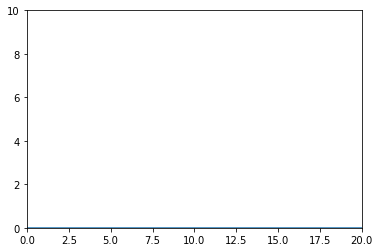

7


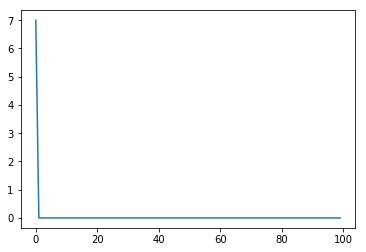

1


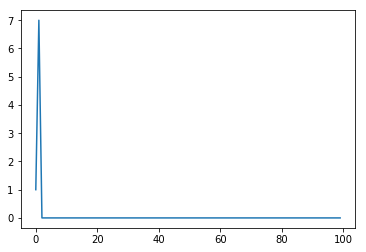

4


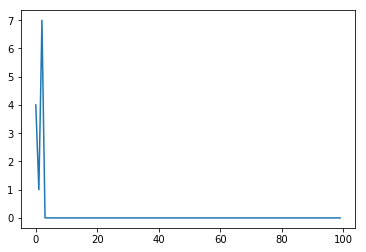

5


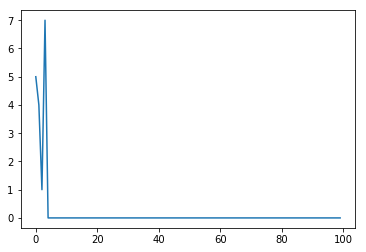

4


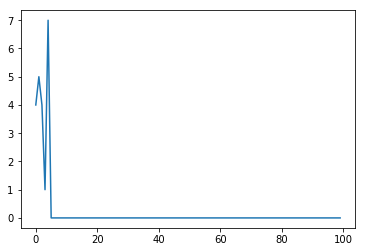

1


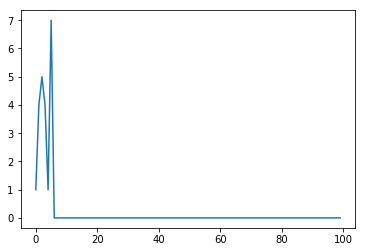

9


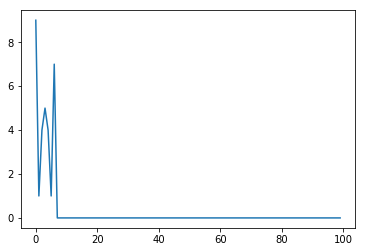

7


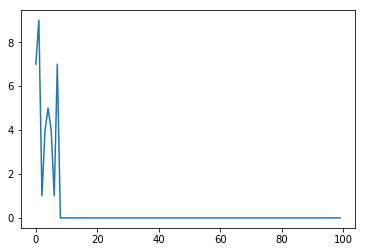

2


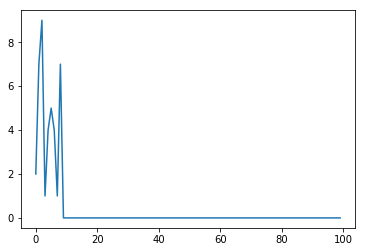

4


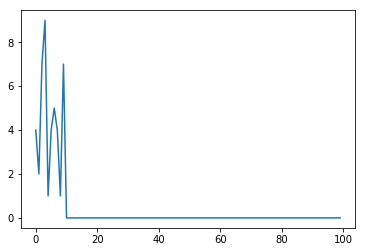

5


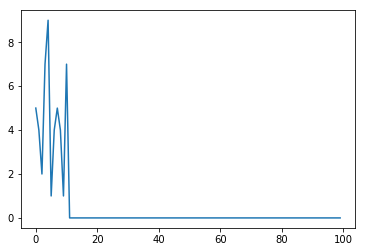

9


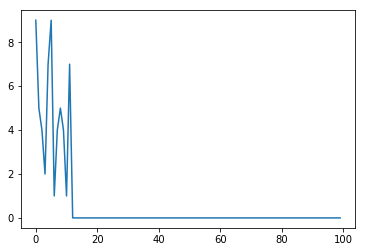

6


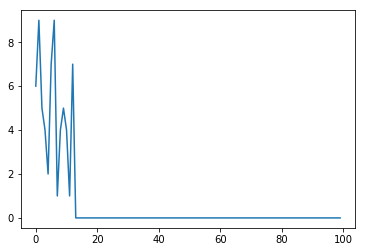

4


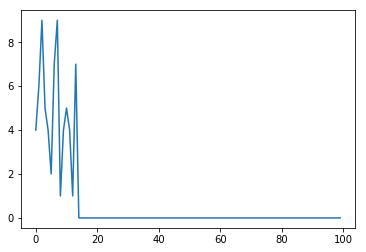

5


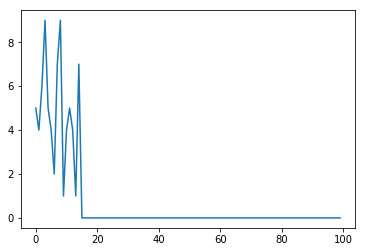

1


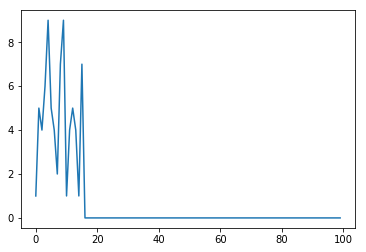

5


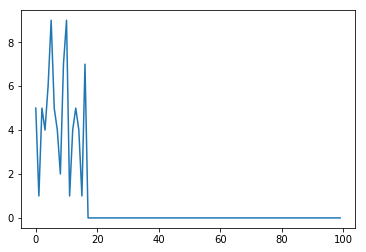

10


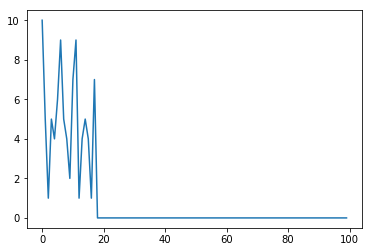

2


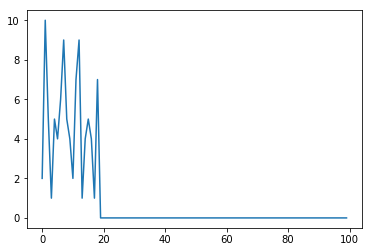

3


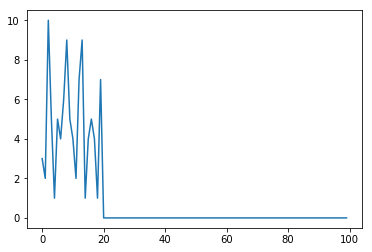

In [72]:
## another real time plot example 


# import time
# import random
# from collections import deque


# # simulates input from serial port
# def random_gen():
#     while True:
#         val = random.randint(1,10)
#         yield val
#         time.sleep(0.1)


# a1 = deque([0]*100)
# ax = plt.axes(xlim=(0, 20), ylim=(0, 10))
# d = random_gen()


# plt.ion()
# line, = plt.plot(a1)
# plt.ylim([0,10])
# plt.show()


# for i in range(0,20):
#     a1.appendleft(next(d))
#     datatoplot = a1.pop()
#     plt.plot(a1)
#     plt.draw()
#     print (a1[0])

#     time.sleep(0.1)
#     plt.show()
#     plt.pause(0.0001) 